Table of Contents

Preface



1 – Look at the Big Picture

2 – Business Constraints

3 – Dataset Backround

4 – Literature Review

6 – Get the Data

7 – Discover & Visualize the Data to gain Insights

8- Select & Train our Models

9 – Fine Tune Our Model

10- Present Our Model

11- Conclusion

12 - References

In [1]:
from IPython.display import HTML

HTML('''<script>

code_show=true; 

function code_toggle() {

 if (code_show){

 $('div.input').hide();

 } else {

 $('div.input').show();

 }

 code_show = !code_show

} 

$( document ).ready(code_toggle);

</script>

<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

In [53]:
def generate_harvard_citation(author,year,title,url,access_date):
    citation= f'{author},{year}.{title}.[Online Course] .Available at: {url} [Accesed] {access_date}]'
    return citation

In [54]:
# Example usage
author = "unknown"
year = "unknown"
title =' Imputation of missing values'
url = "https://scikit-learn.org/stable/modules/impute.html"
access_date = "26-10-2023"
citation = generate_harvard_citation(author, year, title, url, access_date)
print(citation)

unknown,unknown. Imputation of missing values.[Online Course] .Available at: https://scikit-learn.org/stable/modules/impute.html [Accesed] 26-10-2023]


# The Big Picture

We have been tasked by a haulage company to analyse a dataset collected from their scania truck fleet which are used daily. They advise that it is essential to reduce maintance costs as a result breakdowns during daily operations. They advise us some of these breakdowns are  due to the failure of the air pressure system. They have asked by using Data Analytics can we use the dataset to reduce these costs.

WE advise that it may be possible to build a predictive model that may help in identfying the compontents that are and are not linked to the breakdown of the air pressure system. This may help them to arrange maintance schedules to insure the optium functioning of their fleet.

The air pressure system in heavy duty trucks use  compressed air to drive the pistons which use the brake pads to slow down the vechicle. The advantage of this system over a  hydraulic system is that is easyily available and cost effective. However we need to be mindful that as a result of our analysis this may extend or reduce the service intervals for these trucks. There have been instances were failures of air pressure systems have led to human fatalies as a result the cost of misclassification is high. As our EDA will ultimatley lead to a machine learing predictive model being produced it is something we need to be aware off. 

# Machine Learning Formation

This is a binary classification problem. We are presented with two classes postive & negative. The postive class us that the failure was due to a specific component of the APS system, the negative class informs us that the failure has to do with other compnents within the truck. There we would propose that it may be possible to build a machine learning model that when given a  new data point(sensor information) wherther the failure was due to the trucks APS or not
Rithwik Shetty,2021. Predicting a Failure in Scania’s Air Pressure System.[Online Course] .Available at: https://medium.com/towards-data-science/predicting-a-failure-in-scanias-air-pressure-system-aps-c260bcc4d038 [Accesed] 26-10-2023]

# Business Constraints

Latency the time taken to detect a failure in the APS system must be low to avoid an increase in maintenance costs.

We need to consider how we clasify our results. If we build a model which clasifys our data incorrectly this could lead to the breakdown of a truck leading to increase maintance costs 

# Datset Backround

There are over 60.000 datapoints and 171 features within our Dataset. This then can be classed as a high dimensional dataset. This could lead to the curse of dimensionality which may cause problems. in a high dimensional space such as our dataset the concept of distance between data points become less meaningful. It is difficult to find a pattern in the data due to the amount of features.The model starts capturing noise with the data rather than the pattern within the data. One tool to deal with promlem is Princpial Component Analysis (PCA) this tool allows to reduce the features to lower dimensional space thereby allowing us to identify patterns within our data.

While we will use PCA to reduce out features it may not be the optimal solution for our problem. The dataset contains over 170 features which give us rearings from components within the truck, some measurements relate to the APS system, some do not. Our model needs to identify which components are likely to fail. Here we run into no free lunch theorom PCA will allow us to reduce our features but we lose the ability to interpret which components are related to the breaakdown of the APS brake system. 

Another problem we need to be aware is there ia a lot of missing data. This data is classified as missing completally at random(MCAR) as there is no relationship with the missing data point oan other date within the dataset we will suitable imputation methods to resolve this.

We also have an imbalanced class feature  over 59,000 data points relate to the negative class. This could mean our model could guess and end up with a 90% accurracy but would not work well with new data. We will use a smote method to balance our class features.


# Literature Review

Cerqueira, Vítor, et al. “Combining Boosted Trees with Metafeature Engineering for Predictive Maintenance.” International Symposium on Intelligent Data Analysis. Springer, Cham, 2016.

This paper mentions that the authors’ approach to this problem consists of 4 steps. (i) A filter that excludes a subset of features and data points based on the number of missing values; (ii) A metafeature engineering procedure used to create new features based on existing information; (iii) a biased sampling method to deal with class imbalance problem (SMOTE); and (iv) use of boosted trees for classification.

Features having a high percentage of missing values were removed. During their analysis, they found that some features had an extremity of 80% data missing, and 8 out of 170 features had more than 50% missing values. After removing the said features, it was seen that there were duplicate data points, indicating that the removed features have a little effect in getting a good score.

They mentioned that they are treating the problem as an Anomaly Detection problem since the positive class of the data are characterized by rare events in the domain. They used BoxPlot Analysis (for each feature, compare each value to the typical value found in that feature), Local Outlier Factor (compare data point to it’s local neighborhood through density estimation) and Hierarchical Agglomerative Clustering (each step merges two similar group, and the last observation that are merged might be an outlier) for their metafeature engineering.

SMOTE is a method of duplicating the data points of the minority class of the imbalanced dataset, to balance it out. The use of SMOTE + MetaFeature Engineering with XGBOOST library was seen to give the best result.

https://medium.com/towards-data-science/predicting-a-failure-in-scanias-air-pressure-system-aps-c260bcc4d038 [Accesed] 26-10-2023]

Costa, Camila Ferreira, and Mario A. Nascimento. “IDA 2016 Industrial Challenge: Using Machine Learning for Predicting Failures.” International Symposium on Intelligent Data Analysis. Springer, Cham, 2016.

The authors tried different algorithms, namely, Logistic Regression, K-NN, SVM, Decision Trees and Random Forests to solve the problem. They handled the missing data by implementing the Soft-Impute Algorithm. It is a large scale matrix completion algorithm that replaces missing values with current guesses and solves an optimization problem. The imbalance data was handled by setting a high threshold (cut-off) value, meaning the model will predict a negative class only if it is extremely sure.

The final result showed that Random Forest performed the best, giving a Total Cost (given metric) that was 92.56% lesser than their baseline model. The KNN model was the second best classifier with 90.84% improvement, and the Logistic Regression model worked well with 88.72% improvement. The SVM with RBF Kernel improved the total cost by just 86.36%.

This paper compares the performance of different models, on data whose missing values were imputed using more complex algorithms rather than simple mean/median. We see that Ensemble models will work well to tackle this problem, and a high threshold value plays a key role in handling imbalanced data.

https://medium.com/towards-data-science/predicting-a-failure-in-scanias-air-pressure-system-aps-c260bcc4d038 [Accesed] 26-10-2023]



# Performance Metrics

For this project, our performance statistic of choice will be the Macro-F1 Score. The F1 scores for each class are factored into the macro F1 score. It might be useful in demonstrating to us how well our model performs depending on the quantity of correctly identified points for each class. This is helpful because misclassification can be highly costly because an undetected APS breakdown can cause the truck to malfunction while in service and raise maintenance expenses.

https://medium.com/towards-data-science/predicting-a-failure-in-scanias-air-pressure-system-aps-c260bcc4d038 [Accesed] 26-10-2023]

In [4]:
pip install tqdm

Note: you may need to restart the kernel to use updated packages.


In [5]:
pip install missingno

Note: you may need to restart the kernel to use updated packages.


# Get The Data

In [6]:
# import the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.impute import SimpleImputer
from tqdm import tqdm
import missingno as msno
from sklearn.preprocessing import StandardScaler
from matplotlib import pyplot
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from mpl_toolkits.mplot3d import Axes3D
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score,recall_score,f1_score
from sklearn.ensemble import GradientBoostingClassifier,AdaBoostClassifier
import warnings
warnings.filterwarnings('ignore') 


C:\Users\andrew\anaconda3\lib\site-packages\pandas\core\computation\expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


In [7]:
# Read the dataset
train = pd.read_csv('aps_failure_set.csv')

# Show first 5 records
train.head(-5)

,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,neg,76698,na,2130706438,280,0,0,0,0,0,...,1240520,493384,721044,469792,339156,157956,73224,0,0,0
1,neg,33058,na,0,na,0,0,0,0,0,...,421400,178064,293306,245416,133654,81140,97576,1500,0,0
2,neg,41040,na,228,100,0,0,0,0,0,...,277378,159812,423992,409564,320746,158022,95128,514,0,0
3,neg,12,0,70,66,0,10,0,0,0,...,240,46,58,44,10,0,0,0,4,32
4,neg,60874,na,1368,458,0,0,0,0,0,...,622012,229790,405298,347188,286954,311560,433954,1218,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59990,neg,81354,na,2130706432,156,0,0,0,0,0,...,627610,376028,931828,1035236,674626,161266,3284,0,0,0
59991,neg,39308,na,452,374,0,0,0,0,0,...,312426,161694,323438,292350,250112,157636,234932,9506,0,0
59992,neg,14,0,2,2,0,0,0,0,0,...,132,44,80,52,54,0,0,0,0,0
59993,neg,0,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
train.shape

(60000, 171)

In [9]:
train.describe()

,aa_000
count,6.000000e+04
mean,5.933650e+04
std,1.454301e+05
min,0.000000e+00
25%,8.340000e+02
50%,3.077600e+04
75%,4.866800e+04
max,2.746564e+06


In [10]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Columns: 171 entries, class to eg_000
dtypes: int64(1), object(170)
memory usage: 78.3+ MB


# Discover & Visualize Data to Gain Insights

In [11]:
print('Number of data points in the train dataset', train.shape[0])
print('Number of features in the given train dataset', train.shape[1])

Number of data points in the train dataset 60000
Number of features in the given train dataset 171


In [12]:
# Replacing all the class labels as follows:

# neg = 0
# pos = 1
# Replacing all the class labels as follows:

# neg = 0
# pos = 1
class_labels_train = []
for x in tqdm(train.index):
    if train['class'].loc[x] == 'neg':
        class_labels_train.append(0)
        
    else:
        class_labels_train.append(1)

100%|█████████████████████████████████████████████████████████████████████████| 60000/60000 [00:01<00:00, 42395.46it/s]


In [13]:
train['class'] = class_labels_train

In [14]:
train.head()

,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,0,76698,na,2130706438,280,0,0,0,0,0,...,1240520,493384,721044,469792,339156,157956,73224,0,0,0
1,0,33058,na,0,na,0,0,0,0,0,...,421400,178064,293306,245416,133654,81140,97576,1500,0,0
2,0,41040,na,228,100,0,0,0,0,0,...,277378,159812,423992,409564,320746,158022,95128,514,0,0
3,0,12,0,70,66,0,10,0,0,0,...,240,46,58,44,10,0,0,0,4,32
4,0,60874,na,1368,458,0,0,0,0,0,...,622012,229790,405298,347188,286954,311560,433954,1218,0,0


In [15]:
train['class'].value_counts()

class
0    59000
1     1000
Name: count, dtype: int64

Text(0.5, 1.0, 'Histogram plot of class labels')

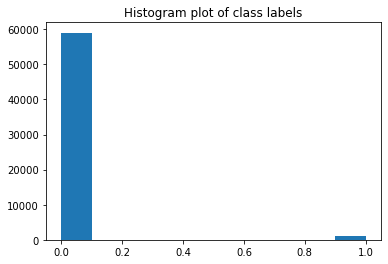

In [16]:
plt.hist(train['class'])
plt.title("Histogram plot of class labels")

In [17]:
print("Percentage of negative class in the given dataset :", (train[train['class']== 0].shape[0] / train.shape[0]) * 100)
print("Percentage of positive class in the given dataset :", (train[train['class']==0].shape[1]/train.shape[1]) * 100)

Percentage of negative class in the given dataset : 98.33333333333333
Percentage of positive class in the given dataset : 100.0


y_train = train['class']
train.drop(['class'],axis = 1,inplace = True)

In [18]:
train.describe(include='all')

,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
count,60000.000000,6.000000e+04,60000,60000,60000,60000,60000,60000,60000,60000,...,60000,60000,60000,60000,60000,60000,60000,60000,60000,60000
unique,NaN,NaN,30,2062,1887,334,419,155,618,2423,...,34489,31712,35189,36289,31796,30470,24214,9725,29,50
top,NaN,NaN,na,0,na,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
freq,NaN,NaN,46329,8752,14861,55543,55476,59133,58587,56181,...,1364,1557,1797,2814,4458,7898,17280,31863,57021,56794
mean,0.016667,5.933650e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,0.128020,1.454301e+05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,0.000000,0.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,0.000000,8.340000e+02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,0.000000,3.077600e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,0.000000,4.866800e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [19]:
# Replacing the na and nan values with np.NaN
train.replace(to_replace='nan', value = np.NaN,inplace = True)

train.replace(to_replace = 'na', value = np.NaN, inplace = True)

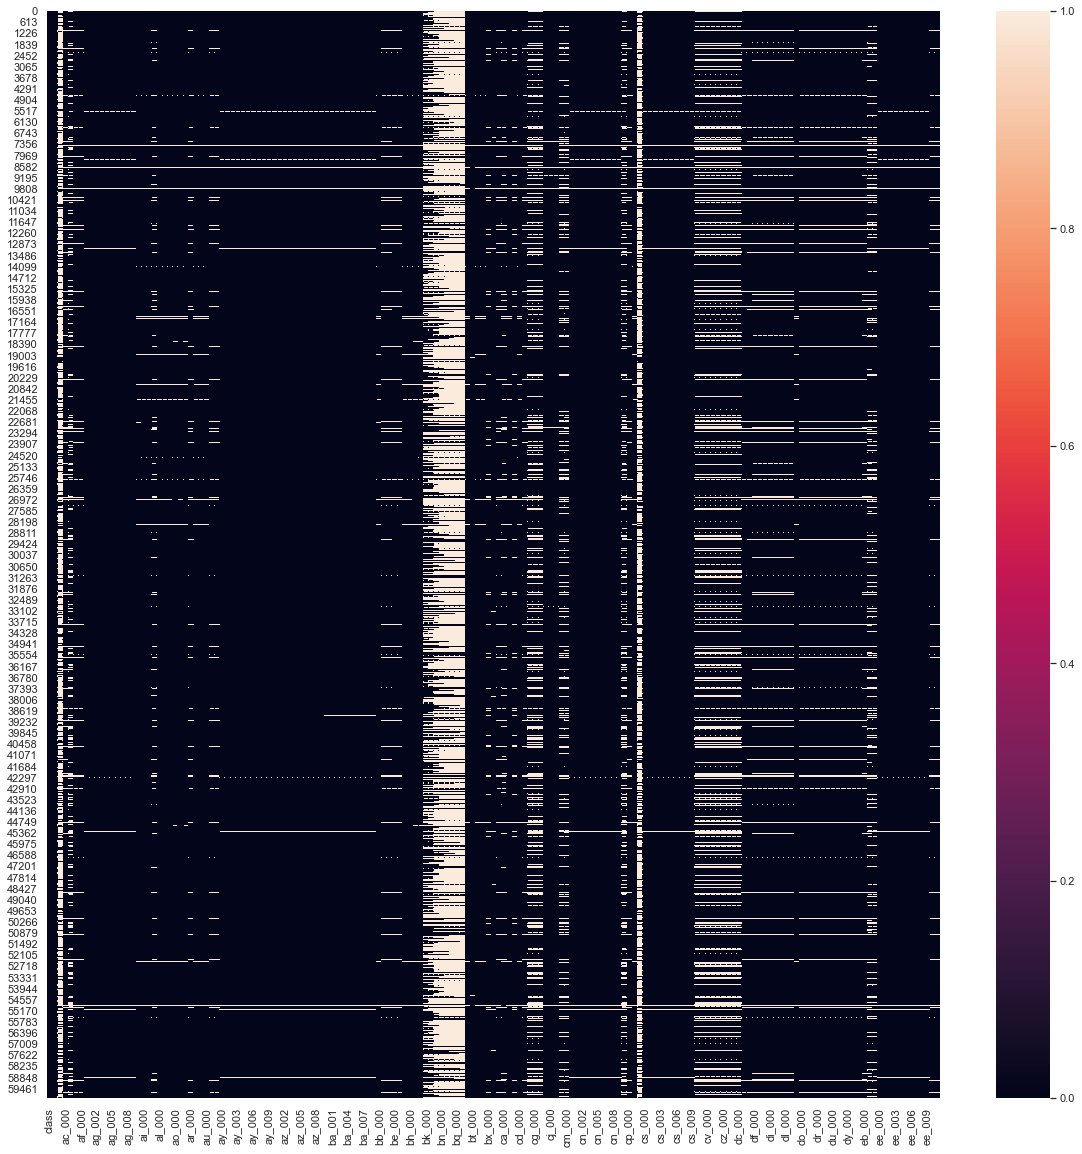

In [20]:
# plotting the heatmap of train dataset to visualize the null values.
sns.set(rc={'figure.figsize':(20,20)})
plot = sns.heatmap(train.isnull())
plt.show(plot)

In [21]:
columns_names = train.columns

<AxesSubplot:label='0f1cc90d-b36b-4db3-b046-2759f84cd294'>

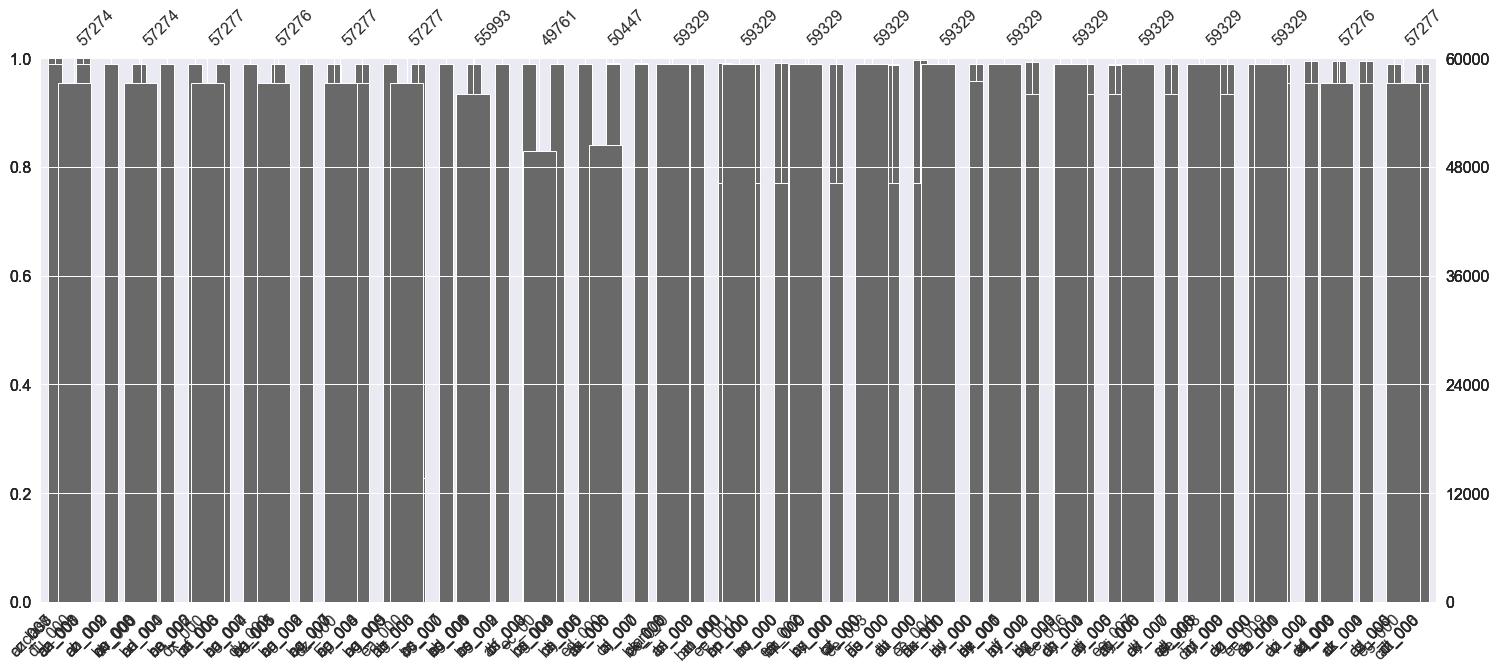

In [22]:
msno.bar(train[columns_names[0:50]])
msno.bar(train[columns_names[50:100]])
msno.bar(train[columns_names[100:150]])
msno.bar(train[columns_names[150:171]])

In [23]:
train.head()

,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,0,76698,NaN,2130706438,280,0,0,0,0,0,...,1240520,493384,721044,469792,339156,157956,73224,0,0,0
1,0,33058,NaN,0,NaN,0,0,0,0,0,...,421400,178064,293306,245416,133654,81140,97576,1500,0,0
2,0,41040,NaN,228,100,0,0,0,0,0,...,277378,159812,423992,409564,320746,158022,95128,514,0,0
3,0,12,0,70,66,0,10,0,0,0,...,240,46,58,44,10,0,0,0,4,32
4,0,60874,NaN,1368,458,0,0,0,0,0,...,622012,229790,405298,347188,286954,311560,433954,1218,0,0


# Prepare The Data For Machine Learning

we are going to drop featuress with more than  70%  missing data as these features do not have calue and merely add noise into our model.

In [24]:
# Dropping all the columns where the number of missing values are more than 42K
train.dropna(axis = 1, thresh=42000,inplace= True)

In [25]:
train.head()

,class,aa_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,ag_003,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,0,76698,2130706438,280,0,0,0,0,0,0,...,1240520,493384,721044,469792,339156,157956,73224,0,0,0
1,0,33058,0,NaN,0,0,0,0,0,0,...,421400,178064,293306,245416,133654,81140,97576,1500,0,0
2,0,41040,228,100,0,0,0,0,0,0,...,277378,159812,423992,409564,320746,158022,95128,514,0,0
3,0,12,70,66,0,10,0,0,0,318,...,240,46,58,44,10,0,0,0,4,32
4,0,60874,1368,458,0,0,0,0,0,0,...,622012,229790,405298,347188,286954,311560,433954,1218,0,0


In [26]:
from sklearn.impute import KNNImputer
scaler=StandardScaler()
X_std = StandardScaler().fit_transform(train.drop(columns=["class"]))
imputer = KNNImputer(n_neighbors=2, weights="uniform")
X_std=imputer.fit_transform(X_std)
pca=PCA(n_components=4)
vecs=pca.fit_transform(X_std)
reduced_df=pd.DataFrame(data=vecs, columns=['Principal Component 1', 'Principal Component 2','Principal Component 3',
                                            'Principal Component 4'])
final_df= pd.concat([reduced_df,train[['class']]],axis=1)
final_df

,Principal Component 1,Principal Component 2,Principal Component 3,Principal Component 4,class
0,2.277811,-1.726007,-0.431946,-0.427902,0
1,-0.709287,-0.581811,-0.065693,0.133103,0
2,-1.398585,-0.146654,-0.087943,0.372527,0
3,-3.393956,0.428466,0.329585,0.254330,0
4,0.206534,-0.326936,-0.733710,-0.175560,0
...,...,...,...,...,...
59995,4.678279,-1.728303,-1.204831,0.034626,0
59996,-3.273137,0.293019,0.342992,0.288610,0
59997,-3.398998,0.319687,0.410367,0.334314,0
59998,2.321590,-3.012685,-0.428116,-0.198590,0


unknown,unknown. Imputation of missing values.[Online Course] .Available at: https://scikit-learn.org/stable/modules/impute.html [Accesed] 26-10-2023]

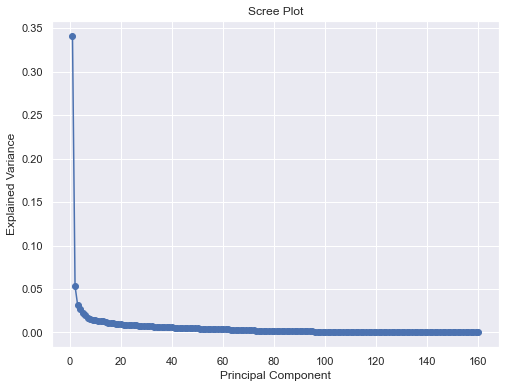

In [27]:
pca= PCA()
pca.fit(X_std)
explained_variance=pca.explained_variance_ratio_
plt.figure(figsize=(8,6))
plt.plot(range(1,len(explained_variance)+ 1),explained_variance,marker='o',linestyle='-')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance')
plt.title('Scree Plot')
plt.show()

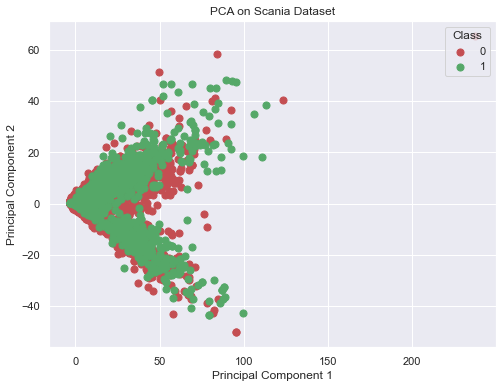

In [28]:
plt.figure(figsize=(8, 6)) # set the size of the canvas
targets = list(set(final_df['class'])) # we create a list of possible targets (there are 3)
colors = ['r', 'g', 'b'] # we define a simple list of colors to differentiate the targets

# loop to assign each point to a target and color
for target, color in zip(targets, colors):
     idx = final_df['class'] == target
     plt.scatter(final_df.loc[idx, 'Principal Component 1'], final_df.loc[idx, 'Principal Component 2'], c=color, s=50)

# finally, we show the graph
plt.legend(targets, title="Class", loc='upper right')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA on Scania Dataset')
plt.show()

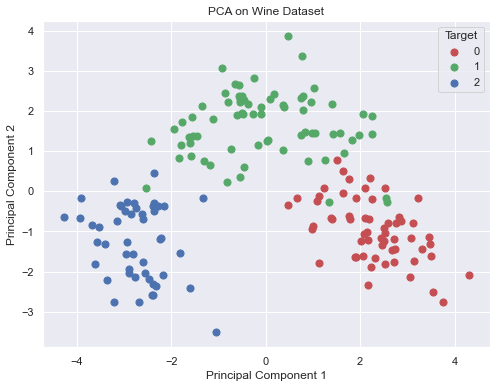

In [52]:
from sklearn.datasets import load_wine
# load the dataset
wine = load_wine()

# convert the object in a pandas dataframe
df = pd.DataFrame(data=wine.data, columns=wine.feature_names)
df["target"] = wine.target
# normalize data
from sklearn.preprocessing import StandardScaler
X_std = StandardScaler().fit_transform(df.drop(columns=["target"]))
# PCA object specifying the number of principal components desired
pca = PCA(n_components=2) # we want to project two dimensions so that we can visualize them!

# We fit the PCA model on standardized data
vecs = pca.fit_transform(X_std)
reduced_df = pd.DataFrame(data=vecs, columns=['Principal Component 1', 'Principal Component 2'])
final_df = pd.concat([reduced_df, df[['target']]], axis=1)

plt.figure(figsize=(8, 6)) # set the size of the canvas
targets = list(set(final_df['target'])) # we create a list of possible targets (there are 3)
colors = ['r', 'g', 'b'] # we define a simple list of colors to differentiate the targets

# loop to assign each point to a target and color
for target, color in zip(targets, colors):
     idx = final_df['target'] == target
     plt.scatter(final_df.loc[idx, 'Principal Component 1'], final_df.loc[idx, 'Principal Component 2'], c=color, s=50)

    # finally, we show the graph
plt.legend(targets, title="Target", loc='upper right')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA on Wine Dataset')
plt.show()


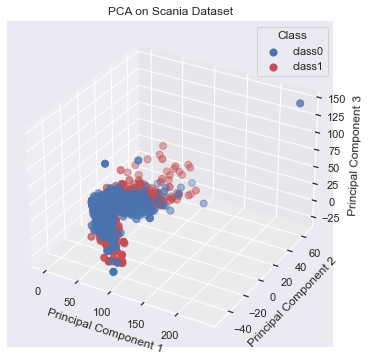

In [29]:
fig= plt.figure(figsize=(8,6))
ax=fig.add_subplot(111,projection="3d")

targets= list(set(final_df['class']))
colors=['b','r','g']


for target, color in zip(targets,colors):
    idx=final_df['class'] ==target
    ax.scatter(final_df.loc[idx,'Principal Component 1'], final_df.loc[idx,'Principal Component 2'],final_df.loc[idx,'Principal Component 3'],c=color, s =50, label=f'class{target}')
    
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
plt.title('PCA on Scania Dataset')

ax.legend(title='Class',loc='upper right')

plt.show()

# Prepare Youe Model

In [30]:
scania_array = final_df.values

In [31]:
from sklearn.model_selection import train_test_split
X = scania_array[:,0:4]
y = scania_array[:,4]
X_train, X_validation, y_train, y_validation = train_test_split(X, y, test_size=0.30, random_state=1)

In [32]:
models=[]
models.append(('LR',LogisticRegression(solver='liblinear',multi_class='ovr')))
models.append(('LDA',LinearDiscriminantAnalysis()))
models.append(('KNN',KNeighborsClassifier()))
models.append(('CART',DecisionTreeClassifier()))
models.append(('NB',GaussianNB()))
models.append(('SVM',SVC(gamma="auto")))
models.append((GradientBoostingClassifier()))
models.append(('AB',AdaBoostClassifier()))

In [33]:


models = []
models.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM' , SVC(gamma="auto")))
models.append(('GB',GradientBoostingClassifier()))
models.append(('AB', AdaBoostClassifier()))

In [34]:
results = []
names = []
for name, model in models:
    kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))

LR: 0.982452 (0.001643)
LDA: 0.978976 (0.002296)
KNN: 0.987119 (0.000961)
CART: 0.983310 (0.001699)
NB: 0.973952 (0.002500)
SVM: 0.984286 (0.000804)
GB: 0.986333 (0.000641)
AB: 0.985310 (0.001460)


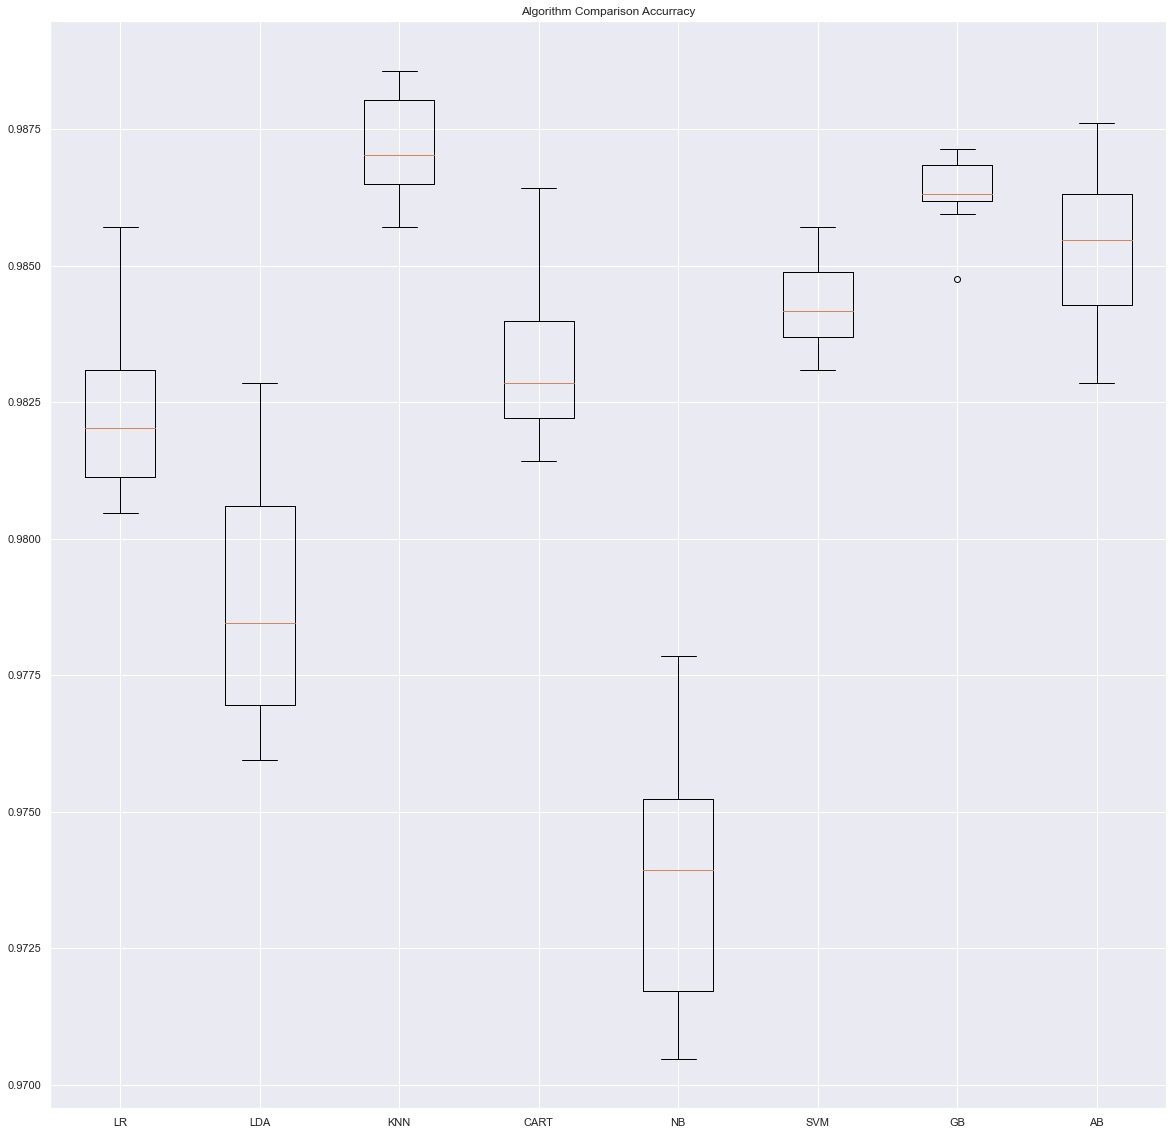

In [35]:
pyplot.boxplot(results, labels=names)
pyplot.title('Algorithm Comparison Accurracy')
pyplot.show()

In [36]:
results = []
names = []
for name, model in models:
    kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='f1_macro')
    results.append(cv_results)
    names.append(name)
    print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))

LR: 0.641253 (0.035637)
LDA: 0.743439 (0.021716)
KNN: 0.772058 (0.023821)
CART: 0.753527 (0.017503)
NB: 0.747607 (0.016180)
SVM: 0.597736 (0.028746)
GB: 0.732616 (0.011621)
AB: 0.727402 (0.029235)


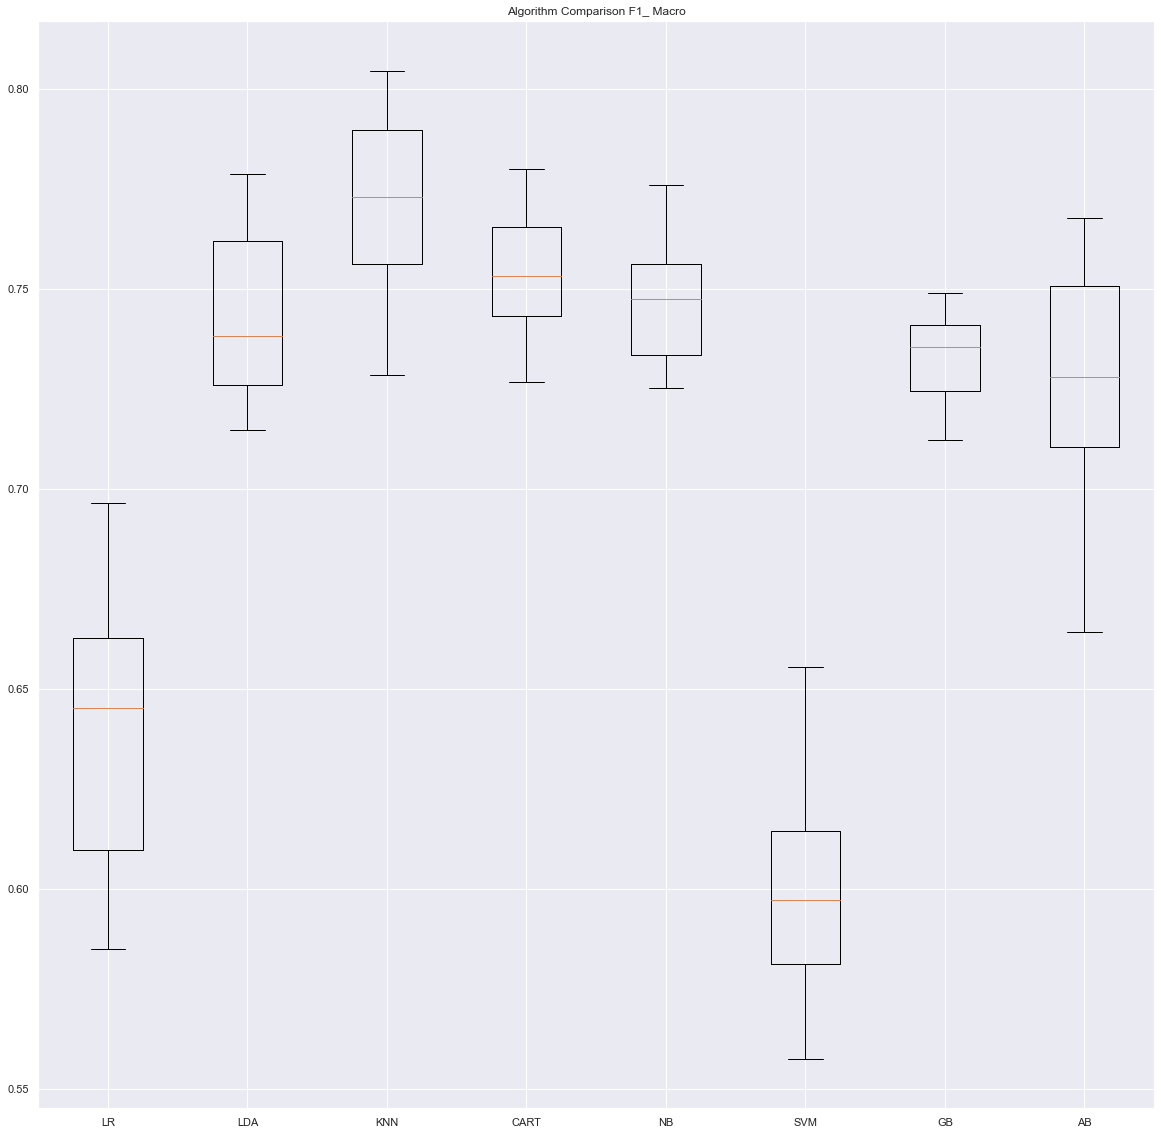

In [37]:
pyplot.boxplot(results, labels=names)
pyplot.title('Algorithm Comparison F1_ Macro')
pyplot.show()

In [38]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score,confusion_matrix
model = KNeighborsClassifier(n_neighbors=5)
model.fit(X_train, y_train)
predictions = model.predict(X_validation)

In [39]:
f1_macro_score=f1_score(y_validation,predictions,average='macro')
confusion_mat=confusion_matrix(y_validation,predictions)

print(' F1 macro Score is:',f1_macro_score)
print(confusion_mat)


 F1 macro Score is: 0.7813042723472103
[[17655    61]
 [  147   137]]


In [40]:
accuracy=accuracy_score(y_validation,predictions)
print('Accuracy:',accuracy)

confusion=confusion_matrix(y_validation,predictions)
print('confusion_matrix:\n',confusion)
                               
f1_macro_score=f1_score(y_validation,predictions,average='macro')
recall=recall_score(y_validation,predictions,average='macro')
precision=precision_score(y_validation,predictions,average='macro')
                               
print('Precision is:',precision)
print('Recall is:',recall)
print('F1- score is:',f1_macro_score)

Accuracy: 0.9884444444444445
confusion_matrix:
 [[17655    61]
 [  147   137]]
Precision is: 0.841830846380897
Recall is: 0.739475575512229
F1- score is: 0.7813042723472103


# Fine Tune Your Model

# Conclusion

# Bibliography